# Data Analyst Nanodegree

## Project 3: Data Wrangling

### Wassim Askoul

### 02/10/2019

#### Introduction

This report is focused on the data wrangling aspect of data analysis. The main objectives are:

- Gathering data manually from datasets fixed by Udacity and programmatically using tweepy from the Twitter API
- Assessing the data visually and programmatically
- Cleaning the data and preparing it for exploration

The data is based on a twitter account: WeRateDogs, which provides posts of dogs and rate them! The output of this report should be a fleshed out explanation of the wrangling process with a short exploration and visualization of the data in the end.

In [1]:
#importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
import os
import tweepy
import json
import warnings

%matplotlib inline

#### Gathering Data

In [2]:
#first dataset -- tweets from WeRateDogs
we_rate_dogs = pd.read_csv('twitter-archive-enhanced.csv')
we_rate_dogs.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [3]:
#second dataset -- neural network algo data on the breads of the dogs in the previous dataset
folder_name = 'dog_breed_nn'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open (os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

In [4]:
dog_breed = pd.read_csv('dog_breed_nn/image-predictions.tsv', sep='\t')
dog_breed.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [9]:
#third dataset is from Twitter API using tweepy, so first authenticate
#please fill your own info here:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [10]:
missing_tweets = []
for i in range(len(we_rate_dogs)):
    try:
        with open(os.path.join(folder_name,'tweet_json'+str(i)+'.txt'), 'w') as outfile:
            tweet = api.get_status(we_rate_dogs.tweet_id[i], tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
    except:
        missing_tweets.append(we_rate_dogs.tweet_id[i])

Rate limit reached. Sleeping for: 284
Rate limit reached. Sleeping for: 638
Rate limit reached. Sleeping for: 630


In [5]:
tweets_and_likes = pd.DataFrame()
ids = []
ret = []
fav = []
for i in range(len(we_rate_dogs)):
    try:
        with open('dog_breed_nn/tweet_json'+str(i)+'.txt') as f:
            data = json.load(f)
        ids.append(data['id'])
        ret.append(data['retweet_count'])
        fav.append(data['favorite_count'])
    except:
        print('dog_breed_nn/tweet_json'+str(i)+'.txt')
tweets_and_likes['tweet_id'] = ids
tweets_and_likes['retweet_count'] = ret
tweets_and_likes['favorite_count'] = fav

dog_breed_nn/tweet_json19.txt
dog_breed_nn/tweet_json95.txt
dog_breed_nn/tweet_json101.txt
dog_breed_nn/tweet_json118.txt
dog_breed_nn/tweet_json132.txt
dog_breed_nn/tweet_json155.txt
dog_breed_nn/tweet_json247.txt
dog_breed_nn/tweet_json260.txt
dog_breed_nn/tweet_json298.txt
dog_breed_nn/tweet_json382.txt
dog_breed_nn/tweet_json506.txt
dog_breed_nn/tweet_json566.txt
dog_breed_nn/tweet_json784.txt
dog_breed_nn/tweet_json818.txt
dog_breed_nn/tweet_json932.txt
dog_breed_nn/tweet_json1726.txt


In [6]:
tweets_and_likes.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8281           37925
1  892177421306343426           6117           32567
2  891815181378084864           4051           24523
3  891689557279858688           8422           41271
4  891327558926688256           9122           39453

#### Assessing Data

First I will present the three datasets we gathered in order to assess any issues visually. After that I will assess the issues of the datasets programmatically using pandas functions. It is good to note that I will be summarizing all assessed issues in the end of this section seperated by quality issues and tideness issues.

In [7]:
pd.set_option('display.max_rows', 2355)
we_rate_dogs

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
30    886267009285017600           8.862664e+17         2.281182e+09   
31    886258384151887873                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
33    885984800019947520                    NaN                  NaN   
34    885528943205470208                    NaN                  NaN   
35    885518971528720385                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
37    885167619883638784                    NaN                  NaN   
38    884925521741709313                    NaN                  NaN   
39    884876753390489601                    NaN                  NaN   
40    884562892145688576                    NaN                  NaN   
41    884441805382717440                    NaN                  NaN   
42    884247878851493888                    NaN                  NaN   
43    884162670584377345                    NaN                  NaN   
44    883838122936631299                    NaN                  NaN   
45    883482846933004288                    NaN                  NaN   
46    883360690899218434                    NaN                  NaN   
47    883117836046086144                    NaN                  NaN   
48    882992080364220416                    NaN                  NaN   
49    882762694511734784                    NaN                  NaN   
50    882627270321602560                    NaN                  NaN   
51    882268110199369728                    NaN                  NaN   
52    882045870035918850                    NaN                  NaN   
53    881906580714921986                    NaN                  NaN   
54    881666595344535552                    NaN         

First issue with this dataset is the last four column could be combined to one categorical variable using the melt function. The next issues are quality issues with the rating columns, which they mainly seem as inaccurate compared to the rest of the observations (note we can reassure our assessment programmatically later): row 188 and 189 --> numenator are 420 and 666, which seems as an intentional mistake since the numbers could have slang terminology, row 313 both columns are off (960/0), rows 433 seems to be descibing more than one dog (84/70) so we can divide it by 7 , row 516 seems to have picked up (24/7) as the rating, which is just a describtion for all the time. Lastly, it seems to be a good tideness fix if we merge both ratings columns into one float column.

In [8]:
dog_breed

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
30    666418789513326592    https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg   
31    666421158376562688    https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg   
32    666428276349472768    https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg   
33    666430724426358785    https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg   
34    666435652385423360    https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg   
35    666437273139982337    https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg   
36    666447344410484738    https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg   
37    666454714377183233    https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg   
38    666644823164719104    https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg   
39    666649482315059201    https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg   
40    666691418707132416    https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg   
41    666701168228331520    https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg   
42    666739327293083650    https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg   
43    666776908487630848    https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg   
44    666781792255496192    https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg   
45    666786068205871104    https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg   
46    666804364988780544    https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg   
47    666817836334096384    https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg   
48    666826780179869698    https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg   
49    666835007768551424    https://pbs.twimg.com/media/CUES51dXIA

The only issue that could be observed here is a consistency issue. The name of the breads should be all lowercase letters in order to have a consistent data.

In [9]:
tweets_and_likes

tweet_id  retweet_count  favorite_count
0     892420643555336193           8281           37925
1     892177421306343426           6117           32567
2     891815181378084864           4051           24523
3     891689557279858688           8422           41271
4     891327558926688256           9122           39453
5     891087950875897856           3037           19830
6     890971913173991426           2008           11595
7     890729181411237888          18377           63976
8     890609185150312448           4172           27234
9     890240255349198849           7188           31255
10    890006608113172480           7140           30027
11    889880896479866881           4848           27237
12    889665388333682689           9780           47119
13    889638837579907072           4408           26576
14    889531135344209921           2191           14800
15    889278841981685760           5229           24717
16    888917238123831296           4390           28513
17    888804989199671297           4175           25039
18    888554962724278272           3452           19410
19    888078434458587136           3403           21299
20    887705289381826560           5250           29553
21    887517139158093824          11386           45303
22    887473957103951883          17707           67550
23    887343217045368832          10152           32975
24    887101392804085760           5810           29947
25    886983233522544640           7575           34410
26    886736880519319552           3195           11815
27    886680336477933568           4353           21965
28    886366144734445568           3120           20756
29    886267009285017600              4             116
30    886258384151887873           6130           27416
31    886054160059072513            104               0
32    885984800019947520           6597           31959
33    885528943205470208           6263           35220
34    885518971528720385           3662           20011
35    885311592912609280          18083               0
36    885167619883638784           4276           21469
37    884925521741709313          17794           75796
38    884876753390489601           5471           27339
39    884562892145688576           4573           23800
40    884441805382717440           5519           26442
41    884247878851493888          19994           71488
42    884162670584377345           2911           19937
43    883838122936631299           3365           21447
44    883482846933004288           9680           44961
45    883360690899218434           3610           22219
46    883117836046086144           6497           36383
47    882992080364220416           3827           23467
48    882762694511734784           4788           27707
49    882627270321602560           5938           27366
50    882268110199369728          11311           44006
51    882045870035918850           4844           28745
52    881906580714921986           3312           23810
53    881666595344535552          10418           49543
54    881633300179243008              7             124
55    881536004380872706          15572           48402
56    881268444196462592           5055           22619
57    880935762899988482           2715           16680
58    880872448815771648           3735           20846
59    880465832366813184           6130           27941
60    880221127280381952           4115           26486
61    880095782870896641           4245           27054
62    879862464715927552           3414           21893
63    879674319642796034             10             305
64    879492040517615616           3107           22950
65    879415818425184262          43272          103718
66    879376492567855104           3043           16450
67    879130579576475649           6662               0
68    879050749262655488           4606           22083
69    879008229531029506           2637           18594
70    878776093423087618           4038 

The main issue here is that one: it is a more tidy data if we combined this dataset with the we_rate_dogs dataset using the tweet_id; two: it seems to be missing data (16 observations to be exact) and one way to deal with this is by either removing those observations from the first dataset or giving them a null in the retweet_count and favorite_count columns.

In [10]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
we_rate_dogs.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

We can see here that the rating issues have way more problems since the min is 0 and the max is 1776.

In [12]:
we_rate_dogs.query('rating_numerator > 17 or rating_numerator < 5')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
290   838150277551247360           8.381455e+17         2.195506e+07   
313   835246439529840640           8.352460e+17         2.625958e+07   
315   835152434251116546                    NaN                  NaN   
340   832215909146226688                    NaN                  NaN   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
605   798576900688019456                    NaN                  NaN   
695   786709082849828864                    NaN                  NaN   
763   778027034220126208                    NaN                  NaN   
765   777885040357281792                    NaN                  NaN   
883   760252756032651264                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
912   757596066325864448                    NaN                  NaN   
979   749981277374128128                    NaN                  NaN   
1004  747816857231626240                    NaN                  NaN   
1016  746906459439529985           7.468859e+17         4.196984e+09   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1189  718246886998687744                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1219  714631576617938945                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1249  711306686208872448                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1303  707420581654872064                    NaN                  NaN   
1314  706901761596989440                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1406  699088579889332224                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
1459  695064344191721472                    NaN                  NaN   
1478  693590843962331137                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1601  686003207160610816                    NaN                  NaN   
1629  684567543613382656                    NaN                  NaN   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1692  681302363064414209                    NaN                  NaN   
1701  680940246314430465                    NaN                  NaN   
1712  680494726643068929                    NaN                  NaN   
1761  678675843183484930                    NaN                  NaN   
1764  678424312106393600                    NaN                  NaN   
1779  677716515794329600                    NaN                  NaN   
1836  676098748976615425                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
1869  675153376133427200                    NaN                  NaN   
1898  674690135443775488                    NaN                  NaN   
1920  674265582246694913                    NaN                  NaN   
1928  674045139690631169                    NaN                  NaN   
1938  673906403526995968                    NaN                  NaN   
1940  673716320723169284           6.737159e+17         

We can use this list to later to go one by one and apply the best replacement we see fit.

In [13]:
dog_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
tweets_and_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [39]:
print(sum(we_rate_dogs.tweet_id.duplicated()))
print(sum(dog_breed.tweet_id.duplicated()))
print(sum(tweets_and_likes.tweet_id.duplicated()))

0
0
0


No duplicates in our data and it is ready for cleaning after we combine the fixes needed in a list. The following is a combined list of all the issues assessed above for reference in the next section: Cleaning.

##### Quality Issues

- we_rate_dogs
    - Drop rows 188, 189, 290, 979, 2074 since they are outliers and will skew our rating
    - Change rows 313, 1165 from 960/00, 4/20 to 13/10
    - Change rows 340 and 695 numerator from 75 to 10 (rounding 9.75), rows 763 to 11 (rounding 11.27)
    - Change row 516 numerator to average of ratings and denominator to 10 (24/7 is a mistake)
    - Change row 2355 from 1/2 to 9/10 (misread text)
- dog_breed
    - change to lowercase words for all three columns (p1, p2, p3) using str.lower()
- tweets_and_likes
    - Remove observations that are in we_rate_dogs using the missing_tweets list since they were deleted and no way to fill these in
    - Remove tweets with outlier rating in we_rate_dogs dataset

##### Tideness Issues

- we_rate_dogs
    - Merge the ratings columns (rating_numerator, rating_denominator) into one column (rating) by dividing them with each other
- tweets_and_likes
    - Join this dataset with we_rate_dogs dataset using the tweet_id column

#### Cleaning Data

First I will create a copy of our three datasets.

In [108]:
we_rate_dogs_clean = we_rate_dogs.copy()
dog_breed_clean = dog_breed.copy()
tweets_and_likes_clean = tweets_and_likes.copy()

###### Define

Manually change quality issues with validity of ratings in some rows, that is:
   - Change rows 313, 1165 from 960/00, 4/20 to 13/10
   - Change rows 340 and 695 numerator from 75 to 10 (rounding 9.75), rows 763 to 11 (rounding 11.27)
   - Change row 516 numerator to average of ratings and denominator to 10 (24/7 is a mistake)
   - Change row 2355 from 1/2 to 9/10 (misread text)

###### Code

In [109]:
we_rate_dogs_clean.iloc[[313, 1165],10] = 13
we_rate_dogs_clean.iloc[[340, 695], 10] = 10
we_rate_dogs_clean.iloc[763, 10] = 11
we_rate_dogs_clean.iloc[516, 10] = 13
we_rate_dogs_clean.iloc[2355, 10] = 9
we_rate_dogs_clean.iloc[[313, 1165, 516, 2355], 11] = 10

###### Test

In [110]:
we_rate_dogs_clean.iloc[[313, 1165, 340, 695, 763, 516, 2355], :]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17           26259576.0   
1165  722974582966214656                    NaN                  NaN   
340   832215909146226688                    NaN                  NaN   
695   786709082849828864                    NaN                  NaN   
763   778027034220126208                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
1165  2016-04-21 02:25:47 +0000   
340   2017-02-16 13:11:49 +0000   
695   2016-10-13 23:23:56 +0000   
763   2016-09-20 00:24:34 +0000   
516   2016-12-19 23:06:23 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
340   <a href="http://twitter.com/download/iphone" r...   
695   <a href="http://twitter.com/download/iphone" r...   
763   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
313   @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   
1165  Happy 4/20 from the squad! 13/10 for all https...                  NaN   
340   RT @dog_rates: This is Logan, the Chow who liv...         7.867091e+17   
695   This is Logan, the Chow who lived. He solemnly...                  NaN   
763   This is Sophie. She's a Jubilant Bush Pupper. ...                  NaN   
516   Meet Sam. She smiles 24/7 &amp; secretly aspir...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
313                        NaN                        NaN   
1165                       NaN                        NaN   
340               4.196984e+09  2016-10-13 23:23:56 +0000   
695                        NaN                        NaN   
763                        NaN                        NaN   
516                        NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
313                                                 NaN                13   
1165  https://twitter.com/dog_rates/status/722974582...                13   
340   https://twitter.com/dog_rates/status/786709082...                10   
695   https://twitter.com/dog_rates/status/786709082...                10   
763   https://twitter.com/dog_rates/status/778027034...                11   
516   https://www.gofundme.com/sams-smile,https://tw...                13   
2355  https://twitter.com/dog_rates/status/666020888...                 9   

      rating_denominator    name doggo floofer  pupper puppo  
313                   10    None  None    None    None  None  
1165                  10    None  None    None    None  None  
340                   10   Logan  None    None    None  None  
695                   10   Logan  None    None    None  None  
763                   10  Sophie  None    None  pupper  None  
516                   10     Sam  None    None    None  None  
2355                  10    None  None    None    None  None

###### Define

Drop rows 188, 189, 290, 979, and 2074 since they are outliers; however, keep track of the tweet_id in a list called outliers so we can drop those rows from tweets_and_likes dataset.

###### Code

In [111]:
outliers = we_rate_dogs_clean.iloc[[188, 189, 290, 979, 2074], 0]
we_rate_dogs_clean.drop([188, 189, 290, 979, 2074], inplace=True)

In [112]:
we_rate_dogs_clean.reset_index(inplace=True, drop=True)

###### Test

In [113]:
we_rate_dogs_clean.iloc[[188, 189, 290, 979, 2074]]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
188   855857698524602368                    NaN                  NaN   
189   855851453814013952                    NaN                  NaN   
290   837820167694528512                    NaN                  NaN   
979   749395845976588288                    NaN                  NaN   
2074  670826280409919488                    NaN                  NaN   

                      timestamp  \
188   2017-04-22 18:55:51 +0000   
189   2017-04-22 18:31:02 +0000   
290   2017-03-04 00:21:08 +0000   
979   2016-07-03 00:14:27 +0000   
2074  2015-11-29 04:47:03 +0000   

                                                 source  \
188   <a href="http://twitter.com/download/iphone" r...   
189   <a href="http://twitter.com/download/iphone" r...   
290   <a href="http://twitter.com/download/iphone" r...   
979   <a href="http://twitter.com/download/iphone" r...   
2074  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
188   HE'S LIKE "WAIT A MINUTE I'M AN ANIMAL THIS IS...                  NaN   
189   Here's a puppo participating in the #ScienceMa...                  NaN   
290   Here's a pupper before and after being asked "...                  NaN   
979   This is George. He just remembered that bees a...                  NaN   
2074  Scary dog here. Too many legs. Extra tail. Not...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
188                        NaN                        NaN   
189                        NaN                        NaN   
290                        NaN                        NaN   
979                        NaN                        NaN   
2074                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
188   https://twitter.com/perfy/status/8558573181681...                13   
189   https://twitter.com/dog_rates/status/855851453...                13   
290   https://twitter.com/dog_rates/status/837820167...                12   
979   https://twitter.com/dog_rates/status/749395845...                10   
2074  https://twitter.com/dog_rates/status/670826280...                 2   

      rating_denominator    name  doggo floofer  pupper  puppo  
188                   10    None   None    None    None   None  
189                   10    None  doggo    None    None  puppo  
290                   10    None   None    None  pupper   None  
979                   10  George   None    None    None   None  
2074                  10    None   None    None    None   None

In [114]:
outliers

188     855862651834028034
189     855860136149123072
290     838150277551247360
979     749981277374128128
2074    670842764863651840
Name: tweet_id, dtype: int64

###### Define

Change all words in columns p1, p2, and p3 in dog_breed to lowercase letters.

###### Code

In [115]:
p1r = []
p2r = []
p3r = []

for i in range(len(dog_breed_clean.p1)):
    p1r.append(dog_breed_clean.p1[i].lower())
    p2r.append(dog_breed_clean.p2[i].lower())
    p3r.append(dog_breed_clean.p3[i].lower())

In [116]:
dog_breed_clean.p1 = p1r
dog_breed_clean.p2 = p2r
dog_breed_clean.p3 = p3r

###### Test

In [117]:
print(dog_breed_clean.p1.all().islower())
print(dog_breed_clean.p2.all().islower())
print(dog_breed_clean.p3.all().islower())

True
True
True


###### Define

Merge the ratings columns (rating_numerator, rating_denominator) into one column (rating) by dividing them with each other.

###### Code

In [118]:
we_rate_dogs_clean['rating'] = we_rate_dogs_clean.rating_numerator/we_rate_dogs_clean.rating_denominator
we_rate_dogs_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)
we_rate_dogs_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls      name doggo floofer  \
0  https://twitter.com/dog_rates/status/892420643...   Phineas  None    None   
1  https://twitter.com/dog_rates/status/892177421...     Tilly  None    None   
2  https://twitter.com/dog_rates/status/891815181...    Archie  None    None   
3  https://twitter.com/dog_rates/status/891689557...     Darla  None    None   
4  https://twitter.com/dog_rates/status/891327558...  Franklin  None    None   

  pupper puppo  rating  
0   None  None     1.3  
1   None  None     1.3  
2   None  None     1.2  
3   None  None     1.3  
4   None  None     1.2

###### Test

In [119]:
we_rate_dogs_clean.rating.describe()

count    2351.000000
mean        1.070717
std         0.220729
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         2.600000
Name: rating, dtype: float64

###### Define

Remove observations that are in we_rate_dogs but not in tweets_and_likes, which are in the missing_tweets list since they were deleted and no way to fill these in. Also, remove tweets in the outliers list from the tweets_and_likes dataset since they were dropped from the we_rate_dogs dataset since they are outliers.

###### Code

In [120]:
final_tweets = set(we_rate_dogs_clean.tweet_id) & set(tweets_and_likes_clean.tweet_id)
final_tweets

{891815181378084864,
 892420643555336193,
 890971913173991426,
 891689557279858688,
 891327558926688256,
 890729181411237888,
 890609185150312448,
 890006608113172480,
 886054160059072513,
 883838122936631299,
 841439858740625411,
 887473957103951883,
 828801551087042563,
 861005113778896900,
 786233965241827333,
 777953400541634568,
 676821958043033607,
 670046952931721218,
 796080075804475393,
 760893934457552897,
 846042936437604353,
 798576900688019456,
 741303864243200000,
 674042553264685056,
 673708611235921920,
 671789708968640512,
 801285448605831168,
 801115127852503040,
 798682547630837760,
 749317047558017024,
 784431430411685888,
 771014301343748096,
 815736392542261248,
 691820333922455552,
 816829038950027264,
 813157409116065792,
 670840546554966016,
 800018252395122689,
 789903600034189313,
 789137962068021249,
 779123168116150273,
 769335591808995329,
 766313316352462849,
 838201503651401729,
 836753516572119041,
 842846295480000512,
 753375668877008896,
 718971898235

In [121]:
for i in range(len(we_rate_dogs_clean)):
    if we_rate_dogs_clean.tweet_id[i] not in final_tweets:
        we_rate_dogs_clean = we_rate_dogs_clean.drop(i, axis=0)

In [122]:
for i in range(len(tweets_and_likes_clean)):
    if tweets_and_likes_clean.tweet_id[i] not in final_tweets:
        tweets_and_likes_clean = tweets_and_likes_clean.drop(i, axis=0)

###### Test

In [123]:
len(we_rate_dogs_clean)

2335

In [124]:
len(tweets_and_likes_clean)

2335

In [125]:
we_rate_dogs_clean.reset_index(inplace=True, drop=True)
tweets_and_likes_clean.reset_index(inplace=True, drop=True)

###### Define

Last issue is to combine both datasets we_rate_dogs and tweets_and_likes into one using the tweet_id column.

###### Code

In [126]:
dogs_rating_clean = pd.merge(we_rate_dogs_clean, tweets_and_likes_clean, on=['tweet_id'])

###### Test

In [127]:
len(dogs_rating_clean)

2335

In [128]:
dogs_rating_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls      name doggo floofer  \
0  https://twitter.com/dog_rates/status/892420643...   Phineas  None    None   
1  https://twitter.com/dog_rates/status/892177421...     Tilly  None    None   
2  https://twitter.com/dog_rates/status/891815181...    Archie  None    None   
3  https://twitter.com/dog_rates/status/891689557...     Darla  None    None   
4  https://twitter.com/dog_rates/status/891327558...  Franklin  None    None   

  pupper puppo  rating  retweet_count  favorite_count  
0   None  None     1.3           8281           37925  
1   None  None     1.3           6117           32567  
2   None  None     1.2           4051           24523  
3   None  None     1.3           8422           41271  
4   None  None     1.2           9122           39453

#### Data Exploration and visualization

This part is going to be a short exploration of the cleaned data in order to just showcase the ease in which we can get insights from this dataset.

In [129]:
dogs_rating_clean.rating.describe()

count    2335.000000
mean        1.069652
std         0.220724
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         2.600000
Name: rating, dtype: float64

In [147]:
retweet_1_per = dogs_rating_clean.query('rating < 1')['retweet_count'].mean()
favorite_1_per = dogs_rating_clean.query('rating < 1')['favorite_count'].mean()

In [148]:
retweet_2_per = dogs_rating_clean.query('rating >= 1 and rating < 1.1')['retweet_count'].mean()
favorite_2_per = dogs_rating_clean.query('rating >= 1 and rating < 1.1')['favorite_count'].mean()

In [149]:
retweet_3_per = dogs_rating_clean.query('rating > 1.1 and rating <= 1.2')['retweet_count'].mean()
favorite_3_per = dogs_rating_clean.query('rating > 1.1 and rating <= 1.2')['favorite_count'].mean()

In [150]:
retweet_4_per = dogs_rating_clean.query('rating > 1.2')['retweet_count'].mean()
favorite_4_per = dogs_rating_clean.query('rating > 1.2')['favorite_count'].mean()

In [151]:
retweet_per = np.array([retweet_1_per,retweet_2_per,retweet_3_per,retweet_4_per])
favorite_per = np.array([favorite_1_per,favorite_2_per,favorite_3_per,favorite_4_per])

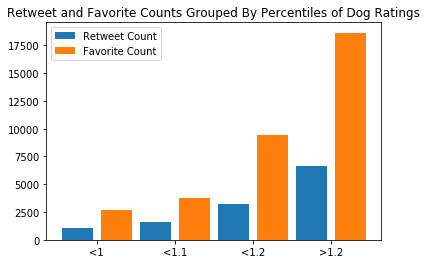

In [185]:
x = np.arange(0,8,2)
y = np.arange(1,8,2)
plt.title('Retweet and Favorite Counts Grouped By Percentiles of Dog Ratings')
plt.bar(x, height= retweet_per, label='Retweet Count')
plt.legend()
plt.bar(y, height= favorite_per, label='Favorite Count')
plt.legend()
plt.xticks(x+0.5, ['<1','<1.1','<1.2','>1.2']);

We can observe two interesting facts from this graph. First, we can see that as the rating from WeRateDogs tweets goes higher, retweets and favorites goes higher. This could be caused by genuinely posting cuter dogs' pictures or that it could be affected with the rating. A further analysis could be interesting! The other observation is that no matter what the rating of the dog/tweet is the favorite is double or more the retweet. This might be observed across tweets no matter about what. People tend to like or favorite a tweet than retweeting it. It is an interseting further analysis that could be conducted. 

In [225]:
gs = np.array(dog_breed_clean.query('p1 == "german_shepherd"').tweet_id)
sh = np.array(dog_breed_clean.query('p1 == "siberian_husky"').tweet_id)

In [224]:
gs_rating = 0;
counter = 0;
for i in gs:
    gs_rating += float(dogs_rating_clean[dogs_rating_clean['tweet_id'] == i]['rating'])
    counter += 1
gs_rating /= counter
gs_rating

1.0999999999999999

In [227]:
sh_rating = 0;
counter = 0;
for i in sh:
    sh_rating += float(dogs_rating_clean[dogs_rating_clean['tweet_id'] == i]['rating'])
    counter += 1
sh_rating /= counter
sh_rating

1.125

The above calculation is a showcase of how easy to compare two of my favorite dog breeds and see how there ratings compare to each other. It appears to be that Seiberian Huskies rate better according to WeRateDogs than German Shepards. It would be intersting doing further A/B test to check whether this is a consistant bias.